In [2]:
import pandas as pd
import json

# Load restaurant.json file
restaurant_file = "./data/restaurants.json"

# Try reading the entire file as a single JSON object first
try:
    restaurants = pd.read_json(restaurant_file)
except ValueError:
    # If that fails, it's likely a JSON lines file
    # Read the JSON file line by line into a DataFrame
    restaurants = pd.read_json(restaurant_file, lines=True)


# Display the first few rows of the dataset
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,wghnIlMb_i5U46HMBGx9ig,China Dragon Restaurant,"1625 W Valencia Rd, Ste 101-103",Tucson,AZ,85746,32.132305,-110.999985,3.0,23,0,"{'WiFi': ''no'', 'BusinessParking': '{'garage'...","Restaurants, Chinese","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
1,8rb-3VYXE37IZix4yOdskw,Sharky's Sports Bar & Grill,820 N Black Horse Pike,Williamstown,NJ,08094,39.696801,-74.999821,2.5,29,1,"{'Alcohol': 'u'full_bar'', 'RestaurantsGoodFor...","American (Traditional), Bars, Nightlife, Sport...",None
2,x9K0RfZaT_zlw6DklBDzjw,Gavi Italian Restaurant,"7401 N La Cholla Blvd, Ste 146",Tucson,AZ,85707,32.221667,-110.925833,3.5,9,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsRe...","Italian, Restaurants",None
3,NZ_bFJma7brQUfln5h1UAg,Super Sushi Kyo Hin,2501 Mt Holly Rd 245,Burlington,NJ,08016,40.041629,-74.825821,3.5,6,0,"{'RestaurantsReservations': 'True', 'Restauran...","Restaurants, Japanese, Sushi Bars, Asian Fusion",None
4,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."


Dataset Shape: (7179, 14)

Columns in the dataset:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7179 entries, 0 to 7178
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   7179 non-null   object 
 1   name          7179 non-null   object 
 2   address       7179 non-null   object 
 3   city          7179 non-null   object 
 4   state         7179 non-null   object 
 5   postal_code   7179 non-null   object 
 6   latitude      7179 non-null   float64
 7   longitude     7179 non-null   float64
 8   stars         7179 non-null   float64
 9   review_count  7179 non-null   int64  
 10  is_open       7179 non-null   int64  
 11  attributes    7088 non-null   object 
 12  catego

<Axes: title={'center': 'Review Count Distribution'}, ylabel='Frequency'>

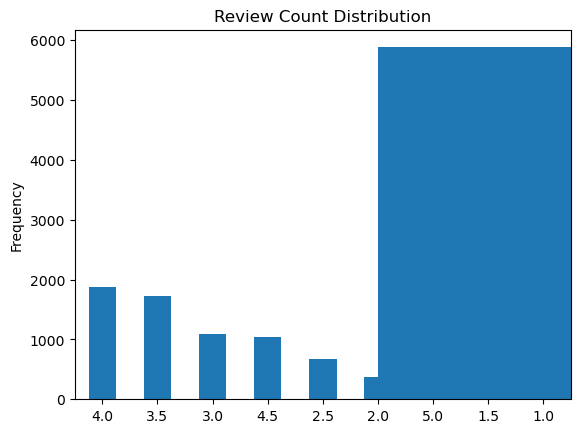

In [3]:
# Overview of the dataset
print("Dataset Shape:", restaurants.shape)
print("\nColumns in the dataset:")
print(restaurants.columns)

# Data types and missing values
print("\nInfo about dataset:")
restaurants.info()

# Statistical summary for numeric columns
print("\nSummary statistics for numeric columns:")
restaurants.describe()

# Distribution of stars (ratings)
print("\nDistribution of Ratings:")
restaurants['stars'].value_counts().plot(kind='bar', title='Ratings Distribution')

# Distribution of review count
restaurants['review_count'].plot(kind='hist', bins=30, title='Review Count Distribution')


<Axes: title={'center': 'Open vs Closed Restaurants'}, xlabel='Open(1) / Closed(0)', ylabel='Count'>

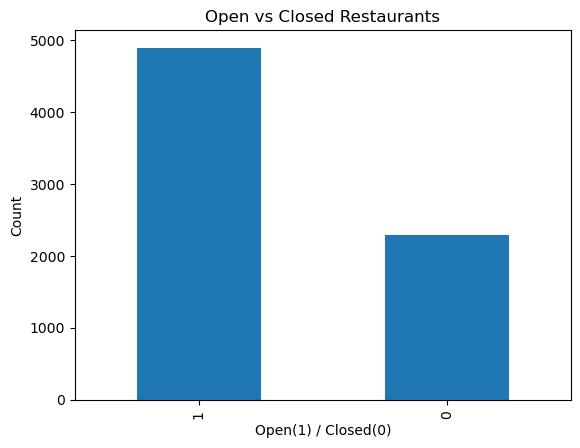

In [4]:
# Distribution of open vs closed restaurants
open_closed_dist = restaurants['is_open'].value_counts()

# Plot the distribution
open_closed_dist.plot(kind='bar', title='Open vs Closed Restaurants', xlabel='Open(1) / Closed(0)', ylabel='Count')


In [5]:
attributes = restaurants['attributes'].apply(pd.Series)
attributes.drop('BusinessParking', axis = 1, inplace = True)
attributes

,WiFi,HasTV,Alcohol,RestaurantsDelivery,RestaurantsPriceRange2,RestaurantsAttire,OutdoorSeating,RestaurantsReservations,RestaurantsGoodForGroups,NoiseLevel,...,Corkage,BYOBCorkage,BYOB,Smoking,GoodForDancing,Open24Hours,AgesAllowed,DietaryRestrictions,RestaurantsCounterService,AcceptsInsurance
0,'no',False,'beer_and_wine',False,2,u'casual',False,True,True,u'quiet',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'free',True,u'full_bar',False,1,u'casual',False,False,True,u'average',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,u'full_bar',False,2,u'casual',True,False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,False,NaN,False,2,u'casual',False,True,True,u'quiet',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u'no',False,u'none',None,2,'casual',True,False,True,u'average',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7174,'no',True,NaN,True,1,u'casual',False,False,True,'very_loud',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7175,NaN,True,u'full_bar',NaN,1,u'casual',True,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7176,u'free',False,u'none',True,NaN,NaN,True,False,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7177,'no',True,'full_bar',False,2,'casual',True,False,True,u'average',...,NaN,NaN,False,u'outdoor',False,NaN,NaN,NaN,NaN,NaN


In [6]:
attributes.columns

Index(['WiFi', 'HasTV', 'Alcohol', 'RestaurantsDelivery',
       'RestaurantsPriceRange2', 'RestaurantsAttire', 'OutdoorSeating',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'NoiseLevel',
       'RestaurantsTakeOut', 'Caters', 'Ambience',
       'BusinessAcceptsCreditCards', 'GoodForKids', 'BikeParking',
       'RestaurantsTableService', 'WheelchairAccessible', 'GoodForMeal',
       'DogsAllowed', 'HappyHour', 'DriveThru', 'Music', 'BestNights',
       'ByAppointmentOnly', 'CoatCheck', 'BusinessAcceptsBitcoin', 'Corkage',
       'BYOBCorkage', 'BYOB', 'Smoking', 'GoodForDancing', 'Open24Hours',
       'AgesAllowed', 'DietaryRestrictions', 'RestaurantsCounterService',
       'AcceptsInsurance'],
      dtype='object')

In [7]:
# Extract 'attributes' column from the restaurants DataFrame
attributes_series = restaurants['attributes']

# Convert JSON-like strings to dictionaries (if applicable)
attributes_series_clean = attributes_series.apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Flatten the attributes column using json_normalize
attributes_df = pd.json_normalize(attributes_series_clean)
attributes_df.drop('BusinessParking', axis = 1, inplace = True)

# Display the first few rows of the flattened attributes
attributes_df.head()

,WiFi,HasTV,Alcohol,RestaurantsDelivery,RestaurantsPriceRange2,RestaurantsAttire,OutdoorSeating,RestaurantsReservations,RestaurantsGoodForGroups,NoiseLevel,...,Corkage,BYOBCorkage,BYOB,Smoking,GoodForDancing,Open24Hours,AgesAllowed,DietaryRestrictions,RestaurantsCounterService,AcceptsInsurance
0,'no',False,'beer_and_wine',False,2,u'casual',False,True,True,u'quiet',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'free',True,u'full_bar',False,1,u'casual',False,False,True,u'average',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,u'full_bar',False,2,u'casual',True,False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,False,NaN,False,2,u'casual',False,True,True,u'quiet',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u'no',False,u'none',None,2,'casual',True,False,True,u'average',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing values in attributes:
AcceptsInsurance              7177
RestaurantsCounterService     7176
DietaryRestrictions           7176
Open24Hours                   7176
AgesAllowed                   7159
BYOBCorkage                   6967
Smoking                       6804
GoodForDancing                6799
CoatCheck                     6718
Corkage                       6694
ByAppointmentOnly             6692
BestNights                    6684
BYOB                          6605
Music                         6568
BusinessAcceptsBitcoin        6303
DriveThru                     6257
DogsAllowed                   5761
HappyHour                     5496
WheelchairAccessible          5431
RestaurantsTableService       4642
GoodForMeal                   3323
Caters                        2402
NoiseLevel                    2388
BikeParking                   2231
WiFi                          2043
RestaurantsAttire             1814
Alcohol                       1735
Ambience                 

<Axes: title={'center': 'Missing Values in Attributes'}>

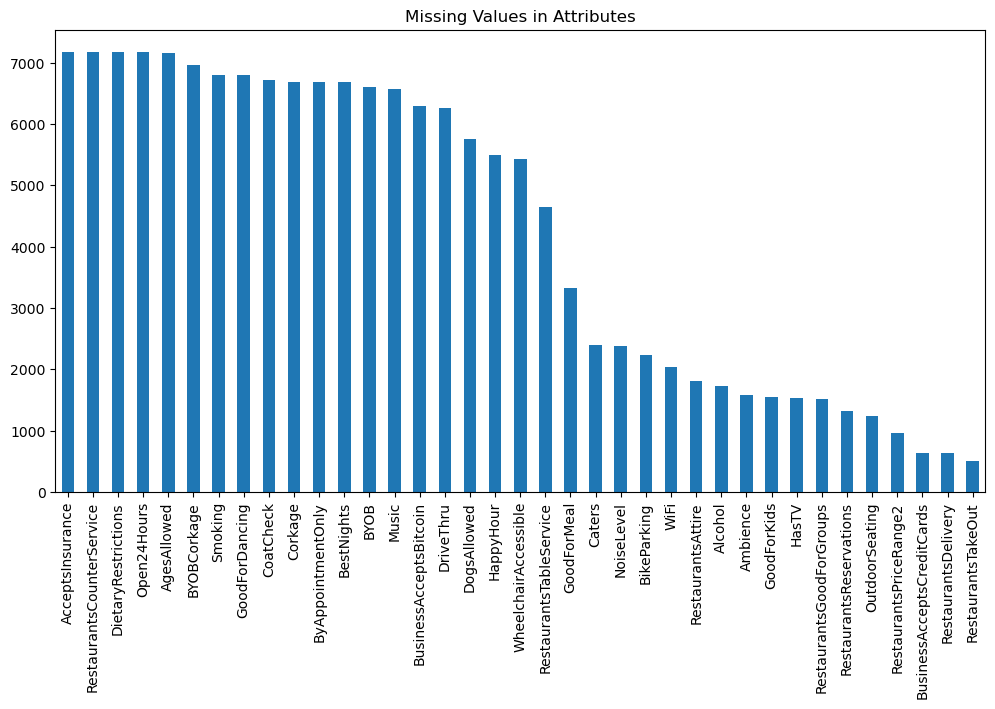

In [8]:
# Check for missing values in each attribute
missing_values = attributes_df.isnull().sum().sort_values(ascending=False)

# Print and plot missing values
print("Missing values in attributes:")
print(missing_values)

# Plot missing values
missing_values[missing_values > 0].plot(kind='bar', figsize=(12, 6), title="Missing Values in Attributes")


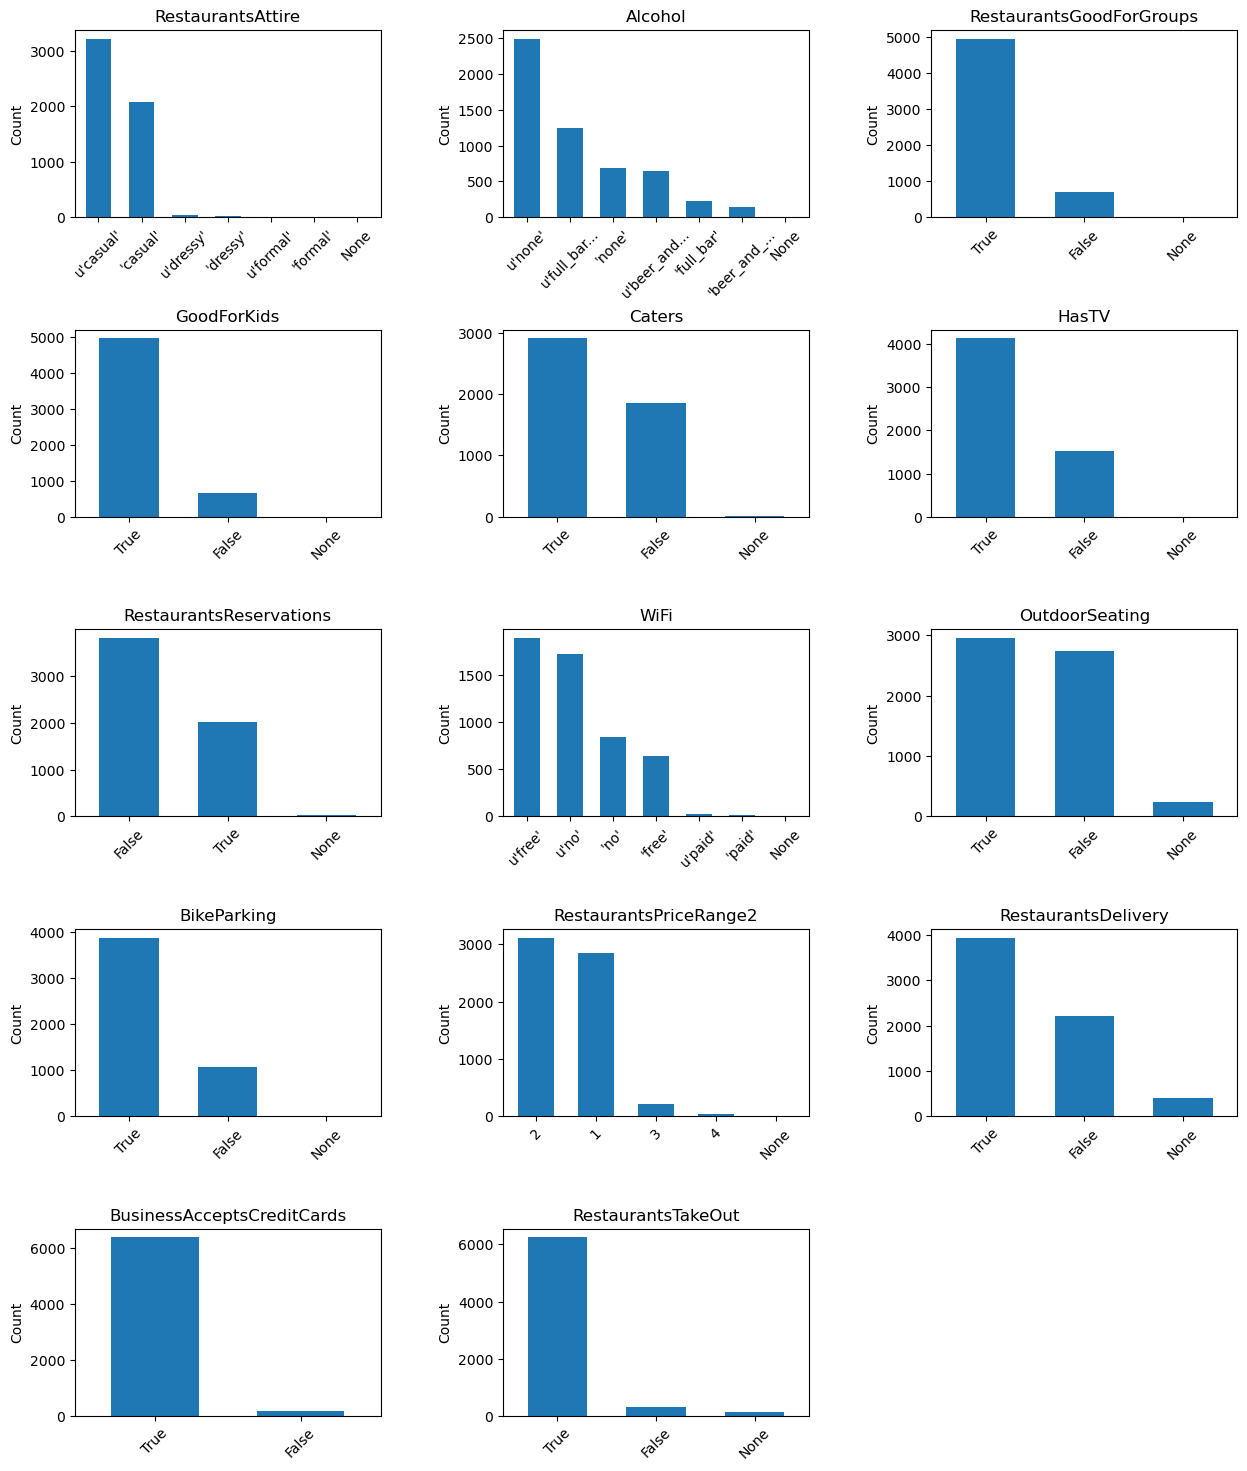

In [9]:
import matplotlib.pyplot as plt

# Selected binary attributes
selected_columns = ["RestaurantsAttire", "Alcohol", "RestaurantsGoodForGroups", "GoodForKids",
                    "Caters", "HasTV", "RestaurantsReservations", "WiFi",
                    "OutdoorSeating", "BikeParking", "RestaurantsPriceRange2",
                    "RestaurantsDelivery", "BusinessAcceptsCreditCards", "RestaurantsTakeOut"]

# Function to truncate x-axis labels
def truncate_label(label, max_length=10):
    return label[:max_length] + "..." if len(label) > max_length else label

# Plot the distribution of binary attributes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(selected_columns):
    if col in attributes_df.columns:
        value_counts = attributes_df[col].value_counts()
        truncated_labels = [truncate_label(str(label)) for label in value_counts.index]
        
        value_counts.plot(kind='bar', ax=axes[i], title=col, width=0.6)
        axes[i].set_xticklabels(truncated_labels, rotation=45)  # Apply truncated labels
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('')  # Remove x-label for cleaner display

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # Increase spacing
plt.show()


In [10]:
# Extract 'categories' column
categories_series = restaurants['categories'].dropna()  # Drop rows with NaN values in 'categories'

# Split by comma and strip whitespace
split_categories = categories_series.apply(lambda x: [category.strip() for category in x.split(',')])

# Flatten the list of lists and extract unique categories
unique_categories = set(category for sublist in split_categories for category in sublist)

# Display unique categories
print("Number of unique categories:", len(unique_categories))
print("Unique categories:")
print(unique_categories)


Number of unique categories: 419
Unique categories:
{"Women's Clothing", 'Event Planning & Services', 'Septic Services', 'Souvenir Shops', 'Professional Services', 'Brazilian', 'Guamanian', 'Beer Bar', 'Persian/Iranian', 'Adult Entertainment', 'Golf Lessons', 'Dive Bars', 'Delis', 'Mini Golf', 'Lebanese', 'Outlet Stores', 'Playgrounds', 'Gyms', 'Bocce Ball', 'Herbs & Spices', 'Popcorn Shops', 'Poutineries', 'Museums', 'Grocery', 'Elementary Schools', 'Bookstores', 'Departments of Motor Vehicles', 'Pretzels', 'Speakeasies', 'Poke', 'Shopping Centers', 'Acupuncture', 'Mongolian', 'Internal Medicine', 'Caterers', 'Russian', 'Gluten-Free', 'Beer', 'Cultural Center', 'Tapas Bars', 'Latin American', 'Ethiopian', 'Karaoke', 'Venezuelan', 'Afghan', 'Chicken Wings', 'Do-It-Yourself Food', 'Bistros', 'Arts & Entertainment', 'Boating', 'Art Classes', 'Vitamins & Supplements', 'Irish', 'Party Supplies', 'Internet Cafes', 'Gift Shops', 'Georgian', 'Southern', 'Shopping', 'Child Care & Day Care', 'S

In [11]:
from collections import Counter

# List of relevant categories (filtered earlier)
relevant_categories = [
    'Soul Food', 'Salvadoran', 'Indonesian', 'Laotian', 'Falafel',
    'Caribbean', 'Haitian', 'Latin American', 'Thai', 'Dumplings', 'Polish',
    'Fast Food', 'American (New)', 'Chicken Wings', 'Butcher', 'Fondue',
    'Specialty Food', 'Food Delivery Services', 'Custom Cakes', 'Desserts',
    'Pancakes', 'Fish & Chips', 'Barbeque', 'Salad', 'Venezuelan', 'Tea Rooms',
    'Coffee Roasteries', 'Bubble Tea', 'Juice Bars & Smoothies', 'Cajun/Creole',
    'Halal', 'Taiwanese', 'Creperies', 'Patisserie/Cake Shop', 'Chinese',
    'Mexican', 'Indian', 'Comfort Food', 'Burgers', 'Seafood', 'Vegetarian',
    'Pizza', 'Hot Dogs', 'Buffets', 'Tacos', 'Sandwiches', 'Cupcakes',
    'Sushi Bars', 'Breakfast & Brunch', 'Greek', 'Vietnamese', 'Diners',
    'Food Trucks', 'Cafes', 'Bakeries', 'Steakhouses', 'Korean', 'Italian'
]

# Step 1: Flatten and filter relevant categories
all_categories = []
for sublist in split_categories:
    for category in sublist:
        if category in relevant_categories:  # Only include relevant categories
            all_categories.append(category)

# Step 2: Count occurrences of each category
category_counts = Counter(all_categories)

# Step 3: Sort and get top 20 categories
top_20_categories = category_counts.most_common(20)

# Step 4: Display the results
print("Top 20 Food/Restaurant Categories by Count:")
for category, count in top_20_categories:
    print(f"{category}: {count}")

Top 20 Food/Restaurant Categories by Count:
Sandwiches: 1168
Pizza: 1093
Mexican: 918
Fast Food: 910
Italian: 789
Breakfast & Brunch: 765
Burgers: 756
American (New): 756
Chinese: 489
Seafood: 432
Salad: 412
Chicken Wings: 378
Cafes: 334
Bakeries: 316
Specialty Food: 252
Desserts: 250
Diners: 233
Sushi Bars: 227
Steakhouses: 185
Barbeque: 184


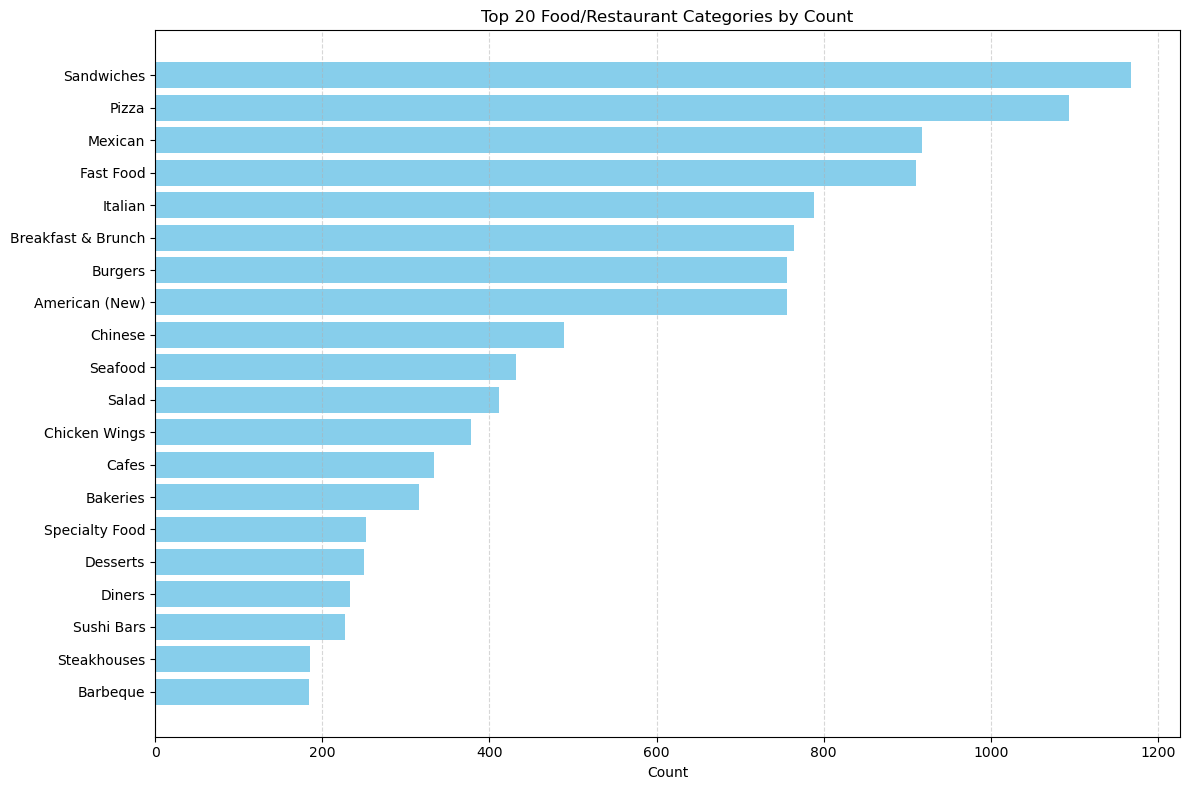

In [12]:

# Extract categories and counts
categories = [x[0] for x in top_20_categories]
counts = [x[1] for x in top_20_categories]

# Plot
plt.figure(figsize=(12, 8))
plt.barh(categories[::-1], counts[::-1], color='skyblue')  # Reverse for top-to-bottom ordering
plt.xlabel('Count')
plt.title('Top 20 Food/Restaurant Categories by Count')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Number of Restaurants by State'}, xlabel='state'>

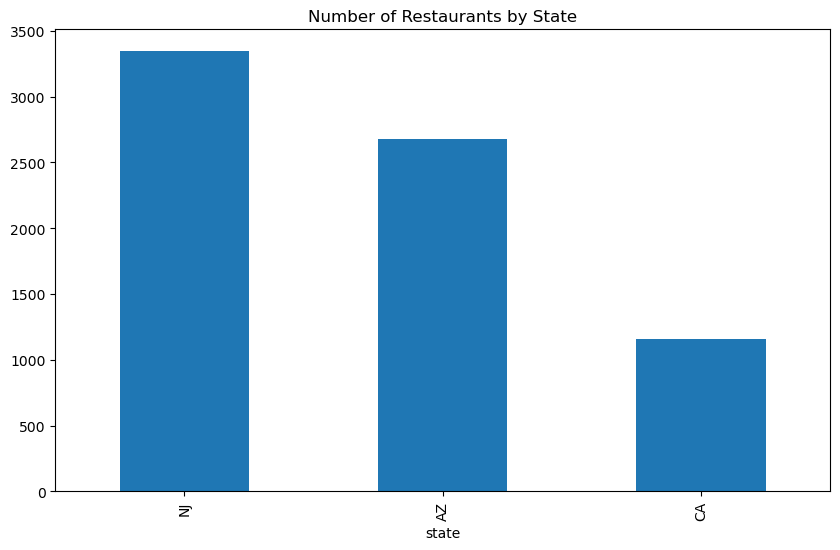

In [13]:
# Count restaurants by state
restaurants_by_state = restaurants['state'].value_counts()

# Plot the distribution
restaurants_by_state.plot(kind='bar', figsize=(10, 6), title='Number of Restaurants by State')


Top cities in CA by number of restaurants:
city
Santa Barbara     767
Goleta            220
Carpinteria        81
Isla Vista         55
Montecito          27
Summerland          9
Santa  Barbara      1
Truckee             1
Name: count, dtype: int64


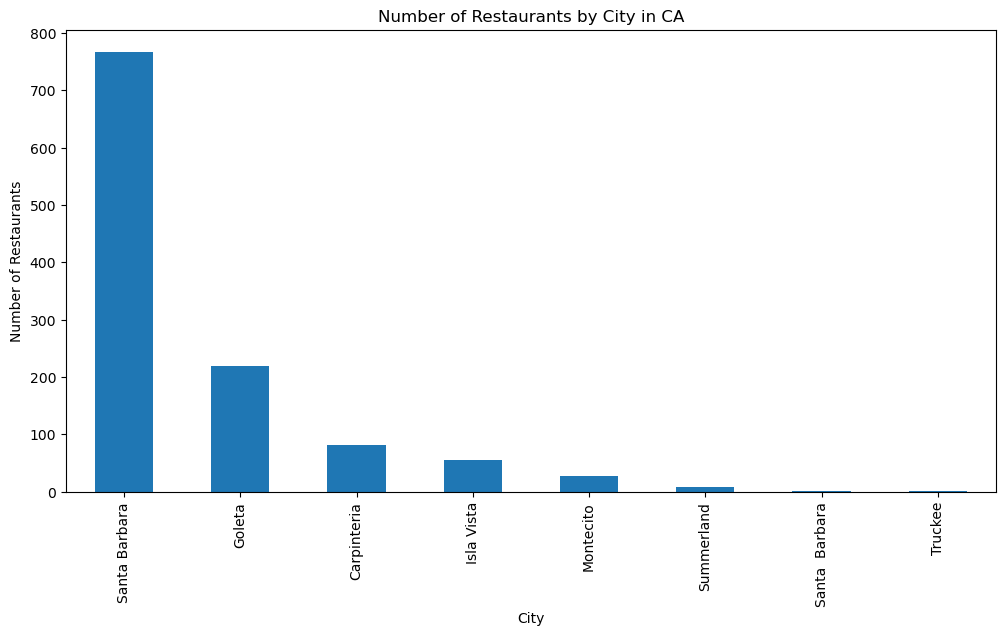

In [14]:
# Filter data for California (CA)
restaurants_ca = restaurants[restaurants['state'] == 'CA']

# Count restaurants by city in CA
restaurants_by_city_ca = restaurants_ca['city'].value_counts()

# Display the top cities by number of restaurants
print("Top cities in CA by number of restaurants:")
print(restaurants_by_city_ca.head(10))

# Plot the distribution
restaurants_by_city_ca.plot(kind='bar', figsize=(12, 6), title='Number of Restaurants by City in CA')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

In [15]:

# Load restaurant.json file
reviews_file = "./data/reviews.json"

# Try reading the entire file as a single JSON object first
try:
    reviews = pd.read_json(reviews_file)
except ValueError:
    # If that fails, it's likely a JSON lines file
    # Read the JSON file line by line into a DataFrame
    reviews = pd.read_json(reviews_file, lines=True)


# Display the first few rows of the dataset
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
1,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
2,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
3,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4,0,0,0,"Yes, this is the only sushi place in town. How...",2013-09-04 03:48:20
4,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,"Great burgers,fries and salad! Burgers have a...",2017-01-02 03:17:34



Missing values in reviews:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Total number of reviews: 88774

Star Rating Distribution:
stars
5    38449
4    21186
1    11092
3    10072
2     7975
Name: count, dtype: int64


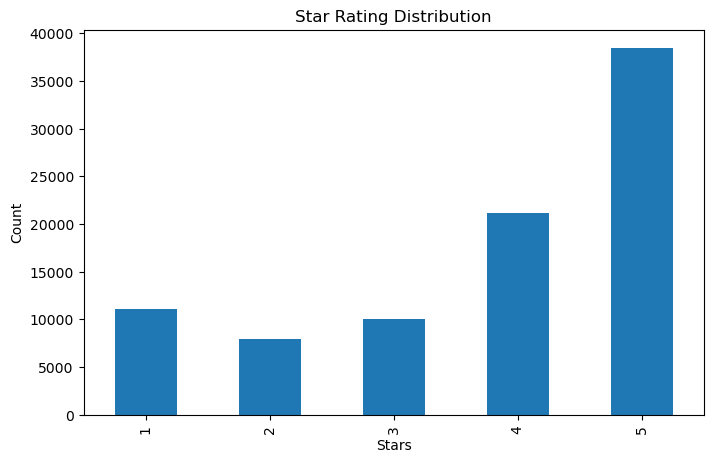

In [16]:
# Check for missing values
print("\nMissing values in reviews:")
print(reviews.isnull().sum())

# Total number of reviews
print("\nTotal number of reviews:", len(reviews))

# Distribution of star ratings
print("\nStar Rating Distribution:")
print(reviews['stars'].value_counts())

reviews['stars'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5), title='Star Rating Distribution')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

In [17]:
# Ensure 'business_id' column exists in both DataFrames
print("\nChecking for business_id column:")
print("business_id in restaurants:", 'business_id' in restaurants.columns)
print("business_id in reviews:", 'business_id' in reviews.columns)

# Perform LEFT JOIN
combined_df = restaurants.merge(reviews, on='business_id', how='left')

# Display combined DataFrame
print("\nCombined DataFrame (Restaurants + Reviews):")
print(combined_df.head())

# Check the shape of the combined DataFrame
print("\nShape of combined DataFrame:", combined_df.shape)


Checking for business_id column:
business_id in restaurants: True
business_id in reviews: True

Combined DataFrame (Restaurants + Reviews):
              business_id                     name  \
0  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   
1  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   
2  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   
3  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   
4  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   

                           address    city state postal_code   latitude  \
0  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   
1  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   
2  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   
3  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   
4  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   

    longitude  stars_x  review_count  ...            categories  \
0 -110.999985   

In [18]:
# Rename columns in the DataFrame
combined_df = combined_df.rename(columns={'stars_x': 'restaurant_rating', 'stars_y': 'review_rating'})

In [19]:
# Check for missing values in the combined data
print("\nMissing values in combined data:")
print(combined_df.isnull().sum())

# Count of reviews per restaurant
reviews_per_restaurant = combined_df['business_id'].value_counts()
print("\nNumber of reviews per restaurant:")
print(reviews_per_restaurant.describe())


Missing values in combined data:
business_id             0
name                    0
address                 0
city                    0
state                   0
postal_code             0
latitude                0
longitude               0
restaurant_rating       0
review_count            0
is_open                 0
attributes            161
categories              0
hours                3889
review_id            5835
user_id              5835
review_rating        5835
useful               5835
funny                5835
cool                 5835
text                 5835
date                 5835
dtype: int64

Number of reviews per restaurant:
count    7179.000000
mean       13.178576
std        64.839624
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      2444.000000
Name: count, dtype: float64



Average Star Ratings by State:
state
CA    3.889972
AZ    3.756931
NJ    3.637631
Name: review_rating, dtype: float64


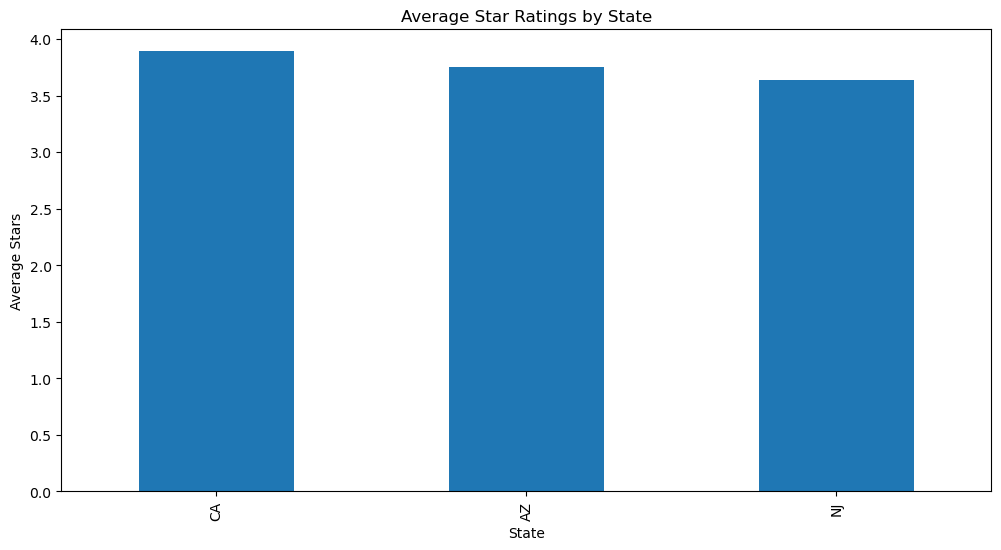

In [20]:
# Average star ratings per state
avg_stars_by_state = combined_df.groupby('state')['review_rating'].mean().sort_values(ascending=False)
print("\nAverage Star Ratings by State:")
print(avg_stars_by_state)

avg_stars_by_state.plot(kind='bar', figsize=(12, 6), title='Average Star Ratings by State')
plt.xlabel('State')
plt.ylabel('Average Stars')
plt.show()


Top 10 Cities by Average Star Ratings:
city
Delanco                  4.888889
Audubon                  4.653846
Westampton               4.642857
Audubon                  4.561290
Mount Laurel Township    4.546341
Pennsauken Township      4.500000
Valencia West            4.500000
Franklinville            4.428571
Camden                   4.303167
Oaklyn                   4.292929
Name: review_rating, dtype: float64


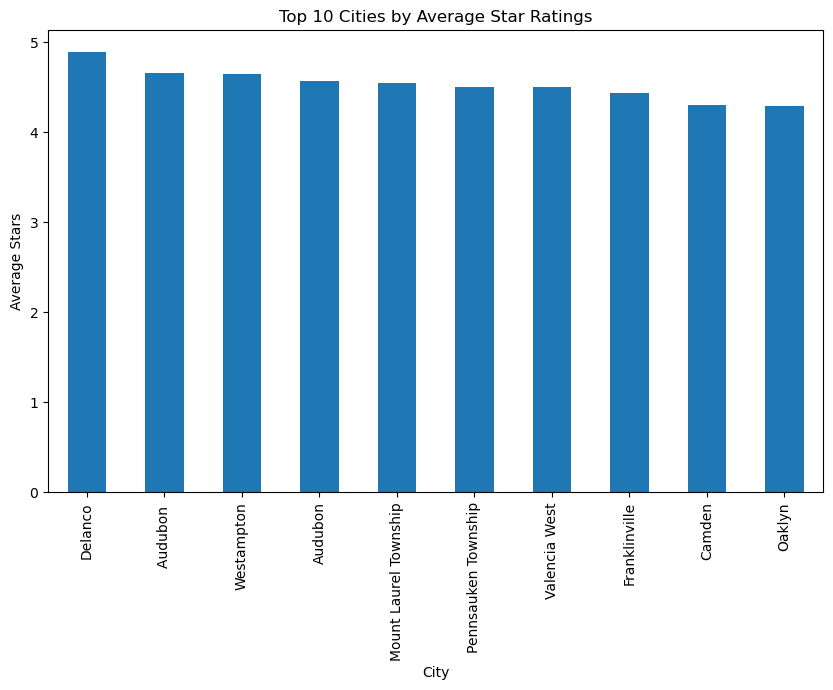

In [21]:
# Average star ratings per city (top 10 cities)
avg_stars_by_city = combined_df.groupby('city')['review_rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Cities by Average Star Ratings:")
print(avg_stars_by_city)

avg_stars_by_city.plot(kind='bar', figsize=(10, 6), title='Top 10 Cities by Average Star Ratings')
plt.xlabel('City')
plt.ylabel('Average Stars')
plt.show()

In [22]:
combined_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'restaurant_rating', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id',
       'review_rating', 'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [23]:
# 1. Add binary vectors for top 20 categories
for category, count in top_20_categories:
    combined_df[category] = combined_df['categories'].apply(lambda x: 1 if isinstance(x, str) and category in x else 0)

# 2. Flatten attributes into binary vectors
def extract_attribute(attribute, x):
    try:
        return 1 if str(x.get(attribute, 'False')).lower() == 'true' else 0
    except:
        return 0

# Apply attribute extraction
for attribute in selected_columns:
    combined_df[attribute] = combined_df['attributes'].apply(lambda x: extract_attribute(attribute, eval(x) if isinstance(x, str) else {}))

# Drop the original 'attributes' and 'categories' columns (optional, if not needed)
combined_df = combined_df.drop(columns=['attributes', 'categories'], errors='ignore')

# Show the updated DataFrame
print("Updated Combined DataFrame with Binary Vectors:")
print(combined_df.head())

Updated Combined DataFrame with Binary Vectors:
              business_id                     name  \
0  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   
1  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   
2  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   
3  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   
4  wghnIlMb_i5U46HMBGx9ig  China Dragon Restaurant   

                           address    city state postal_code   latitude  \
0  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   
1  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   
2  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   
3  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   
4  1625 W Valencia Rd, Ste 101-103  Tucson    AZ       85746  32.132305   

    longitude  restaurant_rating  review_count  ...  Caters HasTV  \
0 -110.999985                3.0            23  ...       0     0   
1 -110.999985                3.0      

In [24]:
combined_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'restaurant_rating', 'review_count', 'is_open',
       'hours', 'review_id', 'user_id', 'review_rating', 'useful', 'funny',
       'cool', 'text', 'date', 'Sandwiches', 'Pizza', 'Mexican', 'Fast Food',
       'Italian', 'Breakfast & Brunch', 'Burgers', 'American (New)', 'Chinese',
       'Seafood', 'Salad', 'Chicken Wings', 'Cafes', 'Bakeries',
       'Specialty Food', 'Desserts', 'Diners', 'Sushi Bars', 'Steakhouses',
       'Barbeque', 'RestaurantsAttire', 'Alcohol', 'RestaurantsGoodForGroups',
       'GoodForKids', 'Caters', 'HasTV', 'RestaurantsReservations', 'WiFi',
       'OutdoorSeating', 'BikeParking', 'RestaurantsPriceRange2',
       'RestaurantsDelivery', 'BusinessAcceptsCreditCards',
       'RestaurantsTakeOut'],
      dtype='object')

In [25]:
columns_to_drop = ['address', 'postal_code', 'latitude', 'longitude', 'review_count', 'hours', 'useful', 'funny', 'cool']
combined_df = combined_df.drop(columns_to_drop, axis=1)
combined_df.columns

Index(['business_id', 'name', 'city', 'state', 'restaurant_rating', 'is_open',
       'review_id', 'user_id', 'review_rating', 'text', 'date', 'Sandwiches',
       'Pizza', 'Mexican', 'Fast Food', 'Italian', 'Breakfast & Brunch',
       'Burgers', 'American (New)', 'Chinese', 'Seafood', 'Salad',
       'Chicken Wings', 'Cafes', 'Bakeries', 'Specialty Food', 'Desserts',
       'Diners', 'Sushi Bars', 'Steakhouses', 'Barbeque', 'RestaurantsAttire',
       'Alcohol', 'RestaurantsGoodForGroups', 'GoodForKids', 'Caters', 'HasTV',
       'RestaurantsReservations', 'WiFi', 'OutdoorSeating', 'BikeParking',
       'RestaurantsPriceRange2', 'RestaurantsDelivery',
       'BusinessAcceptsCreditCards', 'RestaurantsTakeOut'],
      dtype='object')

In [26]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94609 entries, 0 to 94608
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   business_id                 94609 non-null  object        
 1   name                        94609 non-null  object        
 2   city                        94609 non-null  object        
 3   state                       94609 non-null  object        
 4   restaurant_rating           94609 non-null  float64       
 5   is_open                     94609 non-null  int64         
 6   review_id                   88774 non-null  object        
 7   user_id                     88774 non-null  object        
 8   review_rating               88774 non-null  float64       
 9   text                        88774 non-null  object        
 10  date                        88774 non-null  datetime64[ns]
 11  Sandwiches                  94609 non-null  int64     

In [27]:
combined_df = combined_df.dropna()
combined_df.shape

(88774, 45)

In [28]:

import nltk
nltk.download('stopwords')# preprocessing text
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitojha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankitojha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
#Lemmatization
from textblob import TextBlob
from textblob import Word
import string # for finding punctuation in text
import re # regular expression


In [30]:
combined_df['text']=combined_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
combined_df['text'].head()


0    Food used to great year ago but getting really...
1    I really enjoyed my BBQ pork chow mein. The se...
2    I called in an order for pickup and for $30 go...
3    Waitress wa rude when explaining that somethin...
4    Love this place! I have been going here since ...
Name: text, dtype: object

In [31]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again

'''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''

# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
combined_df['text_clear'] = combined_df['text'].apply(preprocess)


def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity


combined_df['senti_polarity'] = combined_df['text_clear'].apply(sentiment)
combined_df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4x/kbv4sd9j7nb9s9p63pl0f4tc0000gn/T/ipykernel_71658/1222768097.py:2: SyntaxWarning: invalid escape sequence '\s'
  x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise


,business_id,name,city,state,restaurant_rating,is_open,review_id,user_id,review_rating,text,...,RestaurantsReservations,WiFi,OutdoorSeating,BikeParking,RestaurantsPriceRange2,RestaurantsDelivery,BusinessAcceptsCreditCards,RestaurantsTakeOut,text_clear,senti_polarity
0,wghnIlMb_i5U46HMBGx9ig,China Dragon Restaurant,Tucson,AZ,3.0,0,Q8k6bndVPPDAQl9KuU9POA,1HUAEUkVOLZ5DptFf7oIvQ,2.0,Food used to great year ago but getting really...,...,0,0,0,0,0,0,0,0,food used great year ago getting really chintz...,0.075397
1,wghnIlMb_i5U46HMBGx9ig,China Dragon Restaurant,Tucson,AZ,3.0,0,vKQdw2cgHsdxlwyZUDu-WA,PiRmHf4zfgo-etVA2-dUJg,4.0,I really enjoyed my BBQ pork chow mein. The se...,...,0,0,0,0,0,0,0,0,really enjoyed bbq pork chow mein service wa g...,0.566667
2,wghnIlMb_i5U46HMBGx9ig,China Dragon Restaurant,Tucson,AZ,3.0,0,4LuT9_uKT--jfsPPAYvXng,8LRqff_u-lHYjeg9sIDcUQ,4.0,I called in an order for pickup and for $30 go...,...,0,0,0,0,0,0,0,0,called order pickup got lot food order wa accu...,0.169388
3,wghnIlMb_i5U46HMBGx9ig,China Dragon Restaurant,Tucson,AZ,3.0,0,VAJn5Wl41yAwgMXPcGSHlA,Kyw24zTGZ6RkSTZos8zh_A,1.0,Waitress wa rude when explaining that somethin...,...,0,0,0,0,0,0,0,0,waitress wa rude explaining something didnt co...,0.058242
4,wghnIlMb_i5U46HMBGx9ig,China Dragon Restaurant,Tucson,AZ,3.0,0,jYUhqcQ4T_bC9g7dkZmS6Q,b_zVJ9n6qiUpGZGM2L4qVg,5.0,Love this place! I have been going here since ...,...,0,0,0,0,0,0,0,0,love place going since little girl continue go...,0.587500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88877,F-GyP16u-CyP59rcqVfaCA,Old Swedes Inn,Swedesboro,NJ,3.5,0,XAHbBDJlcJdjnBH39AW1vw,rvc6hl01z-3UyJ8xKnuMCg,3.0,It's OK. Seems like a place in need of a Gordo...,...,0,0,0,0,0,0,0,0,ok seems like place need gordon ramsay come cl...,0.433333
88878,F-GyP16u-CyP59rcqVfaCA,Old Swedes Inn,Swedesboro,NJ,3.5,0,IhIoFVuXF4tiwoHd_I4_7Q,bMbdclCAgiF24_74TyiOYg,4.0,Generally good food in the main dinning room w...,...,0,0,0,0,0,0,0,0,generally good food main dinning room fairly r...,0.164167
88879,F-GyP16u-CyP59rcqVfaCA,Old Swedes Inn,Swedesboro,NJ,3.5,0,BZmXjHR-aP5_0LKqqi80Yw,I2-daK2G5_kLwXTKGjtvrA,5.0,We just had a very nice dinner here. The resta...,...,0,0,0,0,0,0,0,0,nice dinner restaurant divided two parts casua...,0.187631
88880,R3EM8m4No0SWY9A54YKi7g,Woolwich Diner,Swedesboro,NJ,3.5,0,GoI5lmK1xCLzEPHZHOArOw,cOEVGGetpYZDjDh2MWplhA,1.0,Slow service & hair in the food. Avoid this pl...,...,0,0,0,0,0,0,0,0,slow service hair food avoid place area visiti...,-0.143347


In [32]:
combined_df.describe()

,restaurant_rating,is_open,review_rating,date,Sandwiches,Pizza,Mexican,Fast Food,Italian,Breakfast & Brunch,...,HasTV,RestaurantsReservations,WiFi,OutdoorSeating,BikeParking,RestaurantsPriceRange2,RestaurantsDelivery,BusinessAcceptsCreditCards,RestaurantsTakeOut,senti_polarity
count,88774.000000,88774.000000,88774.000000,88774,88774.000000,88774.000000,88774.000000,88774.00000,88774.000000,88774.000000,...,88774.0,88774.0,88774.0,88774.0,88774.0,88774.0,88774.0,88774.0,88774.0,88774.000000
mean,3.746919,0.787607,3.765145,2016-06-27 16:46:54.182114304,0.159134,0.095478,0.178960,0.06057,0.098835,0.188805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.261927
min,1.000000,0.000000,1.000000,2005-03-01 17:47:15,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000
25%,3.500000,1.000000,3.000000,2014-07-01 23:37:54.750000128,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000
50%,4.000000,1.000000,4.000000,2016-09-25 14:47:44,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.273581
75%,4.000000,1.000000,5.000000,2018-08-25 00:43:12.750000128,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.412500
max,5.000000,1.000000,5.000000,2022-01-19 19:21:05,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
std,0.615443,0.409004,1.405450,NaN,0.365803,0.293876,0.383321,0.23854,0.298442,0.391356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.238953


In [33]:
!pip install scikit-surprise

In [34]:
user_restaurant_data = combined_df.groupby(['user_id', 'business_id']).agg({
    'review_rating': 'mean',
    'senti_polarity': 'mean'
}).reset_index()


In [35]:
user_restaurant_data.head(5)

,user_id,business_id,review_rating,senti_polarity
0,--2F5G5LKt3h2cAXJbZptg,0qu0fNTOsSmuREYVIMPuIQ,4.0,0.031597
1,--8Y8seruJEgwgwznJGyZA,bLnC1_-Kd_Z5qhHNQXCUfQ,2.0,0.250000
2,--FtJYX8N228l3HPB7hkKQ,7UxNDF6ZpabC3O0-Qbg3Xw,4.0,0.389583
3,--KMTwCrhKKUmr7riuS4WQ,29YqJwOGEuAWqlHZxMc1OA,2.0,-0.067805
4,--U6F4iI3ABK6IVCCgYc-g,SJPnC_1BEXUxvU2Xvn9rug,5.0,0.458333


In [36]:
user_item_matrix = user_restaurant_data.pivot(
    index='user_id', columns='business_id', values='review_rating'
)

In [37]:
user_item_matrix = user_item_matrix.fillna(0)



In [38]:
user_item_matrix.head()

business_id,-1MhPXk1FglglUAmuPLIGg,-1PvWminK3Er7fqpTjk19A,-3-6BB10tIWNKGEF0Es2BA,-3AooxIkg38UyUdlz5oXdw,-49YlJ2GGzgmQ71FX9gGyg,-7Rx5jVeQmlVoAU_oXrzew,-9rRsa_9GTkSYkPdKa7T8A,-D_InZvA0lq497RtoNxofw,-Fka99c-tJ-epWYNIobqyQ,-Rmxzme0KxjvRG45p4gqlA,...,zie_uvy3ln9rdTvA2e3gUg,zk7tV01E9N_VenizNqX6yA,zmMLrwNsiHPDBR5C9AfCdg,zmpNbfRPecNkb1FhNbL1IA,zoAZydP_v380Yydf-2u3hw,zrd6bulYNAKhCdSVtJ8aXQ,zsbhf9C1VGNq7vIZ164YVw,ztnxoNY4a3EOXkCQVAx4wg,zu4p6IZLSVn2Noto-vcwzw,zu8Q3zYfgJaOn96LbPt_Hw
user_id,,,,,,,,,,,,,,,,,,,,,
--2F5G5LKt3h2cAXJbZptg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--8Y8seruJEgwgwznJGyZA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--FtJYX8N228l3HPB7hkKQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--KMTwCrhKKUmr7riuS4WQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--U6F4iI3ABK6IVCCgYc-g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_restaurant_data[['user_id', 'business_id', 'review_rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Use SVD (Singular Value Decomposition)
model = SVD()
model.fit(trainset)

predictions = model.test(testset)
from surprise import accuracy
print("RMSE:", accuracy.rmse(predictions))


RMSE: 1.2878
RMSE: 1.2878248807403099


In [58]:
# Predict for a specific user and restaurant
user_id = '--8Y8seruJEgwgwznJGyZA'
business_id = 'bLnC1_-Kd_Z5qhHNQXCUfQ'
# Extract a single value from the DataFrame
r_ui_series = combined_df[(combined_df['user_id'] == user_id) & (combined_df['business_id'] == business_id)]['review_rating']

# Check if the result is empty or not
if not r_ui_series.empty:
    r_ui = r_ui_series.iloc[0]  # Extract the first value
else:
    r_ui = None  # Set to None if no match is found

# Make the prediction
print("Prediction:", model.predict(user_id, business_id, r_ui=r_ui))


Prediction: user: --8Y8seruJEgwgwznJGyZA item: bLnC1_-Kd_Z5qhHNQXCUfQ r_ui = 2.00   est = 4.17   {'was_impossible': False}


In [50]:
user_profiles = combined_df.groupby('user_id')[['Sandwiches', 'Pizza', 'Fast Food', 'senti_polarity']].mean()

In [59]:
print(user_profiles)

                        Sandwiches     Pizza  Fast Food  senti_polarity
user_id                                                                
--2F5G5LKt3h2cAXJbZptg    0.000000  0.000000        0.0        0.031597
--8Y8seruJEgwgwznJGyZA    0.000000  0.000000        0.0        0.250000
--FtJYX8N228l3HPB7hkKQ    0.000000  0.000000        0.0        0.389583
--KMTwCrhKKUmr7riuS4WQ    0.000000  0.000000        0.0       -0.067805
--U6F4iI3ABK6IVCCgYc-g    0.000000  0.500000        0.0        0.479167
...                            ...       ...        ...             ...
zzeRzizkihWHz9bVAvbcVw    0.000000  0.000000        0.0        0.325536
zziJLt25YU6dp01sewR-IQ    0.166667  0.333333        0.0        0.318175
zzjThJ4A1m1N78gquSR_QA    1.000000  0.000000        0.0        0.200000
zzkJpm2B4PNPHnXg-CMyog    0.000000  0.000000        0.0        0.650000
zzsoQwLw7kQcMq73JKZNAQ    0.000000  0.000000        0.0        0.220000

[59773 rows x 4 columns]


In [60]:
print(combined_df[(combined_df['user_id'] == '--FtJYX8N228l3HPB7hkKQ') & (combined_df['business_id'] == '7UxNDF6ZpabC3O0-Qbg3Xw')] )

                 business_id                      name       city state  \
8172  7UxNDF6ZpabC3O0-Qbg3Xw  Yama Japanese Restaurant  Lumberton    NJ   

      restaurant_rating  is_open               review_id  \
8172                3.0        0  tUs3kEqgsTw_iHahQWAaLA   

                     user_id  review_rating  \
8172  --FtJYX8N228l3HPB7hkKQ            4.0   

                                                   text  ...  \
8172  I've only ordered from the Maki portion of the...  ...   

     RestaurantsReservations  WiFi  OutdoorSeating  BikeParking  \
8172                       0     0               0            0   

      RestaurantsPriceRange2  RestaurantsDelivery  BusinessAcceptsCreditCards  \
8172                       0                    0                           0   

      RestaurantsTakeOut                                         text_clear  \
8172                   0  ive ordered maki portion menu roll good satisf...   

      senti_polarity  
8172        0.389583  



In [61]:
# Predict for a specific user and restaurant
# user_id = '-2F5G5LKt3h2cAXJbZptg'
# business_id = '0qu0fNTOsSmuREYVIMPuIQ'
# Extract a single value from the DataFrame
r_ui_series = combined_df[(combined_df['user_id'] == user_id) & (combined_df['business_id'] == business_id)]['review_rating']

# Check if the result is empty or not
if not r_ui_series.empty:
    r_ui = r_ui_series.iloc[0]  # Extract the first value
else:
    r_ui = None  # Set to None if no match is found

# Make the prediction
print("Prediction:", model.predict(user_id, business_id, r_ui=r_ui))


Prediction: user: --8Y8seruJEgwgwznJGyZA item: bLnC1_-Kd_Z5qhHNQXCUfQ r_ui = 2.00   est = 4.17   {'was_impossible': False}


In [54]:
print(r_ui_series)

8172    4.0
Name: review_rating, dtype: float64


In [62]:
def get_top_n_recommendations(predictions, n=10):
    # Map the predictions to each user
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    
    # Sort predictions for each user and retrieve the top N
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    
    return top_n

# Generate predictions for all user-business pairs not in the trainset
predictions = model.test(testset)
top_n = get_top_n_recommendations(predictions, n=5)

# Print Top-N recommendations for a specific user
# user_id = '1dHuy_UMlHOvdNkjfW5l8A'
print(f"Top 5 recommendations for User {user_id}:")
print(top_n[user_id])


Top 5 recommendations for User --8Y8seruJEgwgwznJGyZA:
[('bLnC1_-Kd_Z5qhHNQXCUfQ', 4.169602508266191)]


Top Businesses Length: 1
Predicted Ratings Length: 1


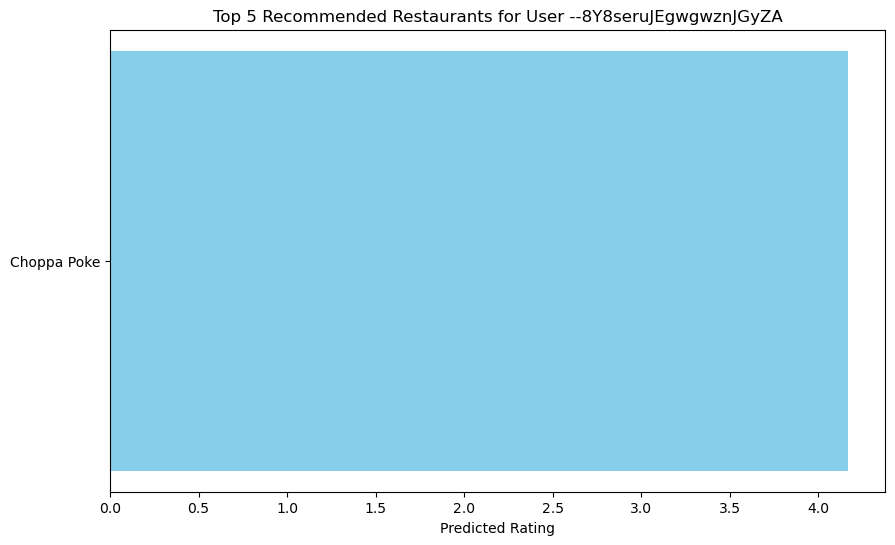

In [63]:
import matplotlib.pyplot as plt

# Retrieve top 5 restaurant predictions for the user
# user_id = '1dHuy_UMlHOvdNkjfW5l8A'  # Replace with your specific user_id

# Extract top 5 business_ids and predicted ratings
top_business_ids = [bid for bid, _ in top_n[user_id]]
predicted_ratings = [rating for _, rating in top_n[user_id]]

# Filter the combined dataframe to get details for these businesses
top_businesses = combined_df[combined_df['business_id'].isin(top_business_ids)].drop_duplicates('business_id')

# Ensure the lengths match (truncate if necessary)
top_businesses = top_businesses.iloc[:len(predicted_ratings)]

# Add the predicted ratings to the filtered dataframe
top_businesses['predicted_rating'] = predicted_ratings

# Verify the alignment
print("Top Businesses Length:", len(top_businesses))
print("Predicted Ratings Length:", len(predicted_ratings))

# Plot the recommendations
plt.figure(figsize=(10, 6))
plt.barh(top_businesses['name'], top_businesses['predicted_rating'], color='skyblue')
plt.xlabel('Predicted Rating')
plt.title(f'Top 5 Recommended Restaurants for User {user_id}')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()




In [64]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Select top 20 category columns and relevant attributes for features
feature_columns = [
    'Sandwiches', 'Pizza', 'Fast Food', 'Breakfast & Brunch', 'American (New)',
    'Burgers', 'Mexican', 'Italian', 'Seafood', 'Chinese'
]

# Extract features into a new DataFrame
restaurant_features = combined_df[feature_columns].fillna(0)
print("Feature DataFrame Shape:", restaurant_features.shape)





Feature DataFrame Shape: (88774, 10)


In [80]:
print(restaurant_features.describe())
print(restaurant_features.head())


        Sandwiches        Pizza    Fast Food  Breakfast & Brunch  \
count  1344.000000  1344.000000  1344.000000         1344.000000   
mean      0.161458     0.157738     0.129464            0.100446   
std       0.368090     0.364631     0.335838            0.300706   
min       0.000000     0.000000     0.000000            0.000000   
25%       0.000000     0.000000     0.000000            0.000000   
50%       0.000000     0.000000     0.000000            0.000000   
75%       0.000000     0.000000     0.000000            0.000000   
max       1.000000     1.000000     1.000000            1.000000   

       American (New)      Burgers      Mexican      Italian      Seafood  \
count     1344.000000  1344.000000  1344.000000  1344.000000  1344.000000   
mean         0.116071     0.109375     0.129464     0.110863     0.053571   
std          0.320430     0.312225     0.335838     0.314079     0.225254   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25

In [69]:
# Retain only unique businesses for features
unique_business_df = combined_df.drop_duplicates(subset='business_id')
restaurant_features = restaurant_features.loc[unique_business_df.index]  # Align features


In [70]:
# Calculate cosine similarity on unique businesses
cosine_sim = cosine_similarity(restaurant_features, restaurant_features)

# Create cosine similarity DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, 
                             index=unique_business_df['business_id'], 
                             columns=unique_business_df['business_id'])
print("Cosine Similarity Matrix Shape:", cosine_sim_df.shape)


Cosine Similarity Matrix Shape: (1344, 1344)


In [71]:
# Number of unique business IDs
unique_business_ids = combined_df['business_id'].unique()
print(f"Number of unique business IDs: {len(unique_business_ids)}")

# Shape of cosine similarity matrix
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")

# Filter to retain only unique businesses
filtered_df = combined_df.drop_duplicates(subset='business_id')
print(f"Filtered business IDs: {len(filtered_df['business_id'])}")




# Check if they match
if len(unique_business_ids) != cosine_sim.shape[0]:
    raise ValueError("Mismatch between cosine similarity matrix size and unique business IDs!")





Number of unique business IDs: 1344
Cosine similarity matrix shape: (1344, 1344)
Filtered business IDs: 1344


In [72]:
# Create mappings and check alignment
business_id_to_idx = {business_id: idx for idx, business_id in enumerate(filtered_df['business_id'])}
idx_to_business_id = {idx: business_id for business_id, idx in business_id_to_idx.items()}

# Verify size consistency
if len(business_id_to_idx) != cosine_sim.shape[0]:
    raise ValueError("Mismatch between cosine similarity matrix size and business_id mapping!")




In [73]:
def recommend_similar_restaurants(user_id, combined_df, cosine_sim, top_n=5):
    """
    Recommend restaurants for a specific user based on cosine similarity.

    Args:
        user_id (str): User ID.
        combined_df (DataFrame): Combined dataset.
        cosine_sim (ndarray): Cosine similarity matrix.
        top_n (int): Number of recommendations to return.

    Returns:
        DataFrame: Top recommended restaurants.
    """
    # Create a mapping of business_id to matrix indices
    business_id_to_idx = {business_id: idx for idx, business_id in enumerate(combined_df['business_id'].unique())}
    idx_to_business_id = {idx: business_id for business_id, idx in business_id_to_idx.items()}

    # Get restaurants reviewed by the user
    user_reviews = combined_df[combined_df['user_id'] == user_id]
    if user_reviews.empty:
        raise ValueError(f"No reviews found for user_id: {user_id}")

    # Initialize an empty Series to store aggregated similarity scores
    recommended_restaurants = pd.Series(dtype='float64')

    for business_id in user_reviews['business_id']:
        # Map business_id to index and retrieve similarity scores
        if business_id in business_id_to_idx:
            business_idx = business_id_to_idx[business_id]
            sim_scores = pd.Series(cosine_sim[business_idx], index=combined_df['business_id'].unique())
            recommended_restaurants = recommended_restaurants.add(sim_scores, fill_value=0)

    # Remove restaurants already reviewed by the user
    reviewed_business_ids = set(user_reviews['business_id'])
    recommended_restaurants = recommended_restaurants[~recommended_restaurants.index.isin(reviewed_business_ids)]

    # Sort restaurants based on similarity score
    recommended_restaurants = recommended_restaurants.sort_values(ascending=False).head(top_n)

    # Fetch restaurant details from the combined DataFrame
    recommendations = combined_df.drop_duplicates(subset='business_id')
    recommendations = recommendations[recommendations['business_id'].isin(recommended_restaurants.index)]
    recommendations = recommendations[['name', 'business_id']].reset_index(drop=True)

    # Map similarity scores to recommendations
    recommended_restaurants = recommended_restaurants.reset_index()
    recommended_restaurants.columns = ['business_id', 'similarity_score']
    recommendations = recommendations.merge(recommended_restaurants, on='business_id', how='left')

    return recommendations.sort_values(by='similarity_score', ascending=False)





In [76]:
# Test the recommendation for a specific user
# user_id = 'mh_-eMZ6K5RLWhZyISBhwA'  # Replace with a valid user_id
recommendations = recommend_similar_restaurants(user_id, combined_df, cosine_sim, top_n=5)

print("Top Recommended Restaurants for User:")
print(recommendations)




Top Recommended Restaurants for User:
                                        name             business_id  \
0                 Blue2o Seafood Grill + Bar  ckAA5u2D8bGqQZ0JFjLH4Q   
1                               Ritz Seafood  tXKRz7JNNcIL_MgrNN_kBg   
2                            Seafood De'Lite  furthjQKGov9Wv7AlcJxCQ   
3  Mr. An's Teppan Steak & Seafood Sushi Bar  dhj16roKb6Z-TyJ0w6iqjQ   
4                       Cheeseboro's Kitchen  22CB12ZGvOIg731zlFot7Q   

   similarity_score  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  


In [115]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_rmse_cosine(recommend_func, combined_df, testset, cosine_sim, top_n=5):
    """
    Evaluate the RMSE for cosine similarity-based recommendations.

    Args:
        recommend_func (function): Recommendation function.
        combined_df (DataFrame): Combined dataset.
        testset (list): List of tuples (user_id, business_id, true_rating).
        cosine_sim (ndarray): Cosine similarity matrix.
        top_n (int): Number of recommendations.

    Returns:
        float: RMSE score.
    """
    predictions = []
    actual_ratings = []

    for user_id, business_id, true_rating in testset:
        # Get recommendations for the user
        recommendations = recommend_func(user_id, combined_df, cosine_sim, top_n)
        
        # Check if the business_id is in recommendations
        predicted_rating = recommendations.loc[recommendations['business_id'] == business_id, 'similarity_score']
        
        if not predicted_rating.empty:
            predictions.append(predicted_rating.values[0])
            actual_ratings.append(true_rating)

    # Ensure predictions and actual_ratings have the same length
    if len(predictions) > 0 and len(actual_ratings) > 0:
        rmse = np.sqrt(mean_squared_error(actual_ratings, predictions))
    else:
        rmse = None  # Handle cases where no predictions are made

    return rmse


In [117]:
print(testset)

[('9pUlsUx7Vh-WgejT5yTyMw', 'EtM079Cj7-B3G7jPsGYb_Q', 1.0), ('U03vrBiap9-OFUtKi3Hi_w', 'L3u4I6wHtwMQJ-ZtvfrkkQ', 2.0), ('zKGSWBeasj0JR09H1OcQZQ', 'SVJJIoAiW3vHwoSpVnUcLQ', 1.0), ('vMRIyYx4ihLWmTZXUtPltg', 'cN4Y09a7clgjFd1tY-wSZw', 1.0), ('Psoz3yb-y2545f0jaGmCDw', '5lGOPqwxBNR9hfA9mFr2vA', 5.0), ('x8D6tReUyVLwlD1Wz3HUzg', 'SZU9c8V2GuREDN5KgyHFJw', 4.0), ('WZDNO7MI_G_MFeLUQKOj5w', '3XRHR2IZ7yd3FDAogps20A', 5.0), ('AE-ia0Ts14cesSIZ_ZXZdw', 'wexGsdw5Wz85-hOBx9r2Tg', 5.0), ('VkMxVcWxTUZ8u_GWihUnew', 'CYwC5OjwCN6ib_AQDxi3Ow', 3.0), ('acJnO-e8J9aUPpOz2LhkHg', 'EGWv78OQgeqfi4lXThlP8A', 5.0), ('P6sQoJu4vqw6wYpEp7UZeQ', '9piIhWbzbr-47RL-Rh63Iw', 4.0), ('UbNi6QSy3vCkGmHNM0vHSQ', 'S6f2zH9m5FbQ-CQlbX8TAw', 4.0), ('jLV8xjqegJmH4C8E0GHpfQ', '1FURjeGJi_LBXcJQg8eskw', 4.0), ('SgZRlxt9Z_HZB4X4CyK4VA', 'dsNKRi0XlMm7JOWbVk0Nvw', 1.0), ('DCrBU8W-V7UItcR3v-I_HQ', 'OPhWuFj83RDS9O1qU21X8Q', 1.0), ('tT0mAggFVIAzaJBFrckEHw', 'pqF3WkYktbR28uk2PSR7Rg', 5.0), ('BwC6JnnmWP50MS6UubOv6Q', 'H3p3b8nbB3OtIfQyQGKDkg', 4.

In [116]:
# Evaluate RMSE for cosine similarity
rmse_cosine = evaluate_rmse_cosine(recommend_similar_restaurants, combined_df, testset, cosine_sim, top_n=5)

if rmse_cosine is not None:
    print(f"Cosine Similarity Model RMSE: {rmse_cosine:.4f}")
else:
    print("No predictions could be made for the given testset.")


No predictions could be made for the given testset.


In [114]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load data for collaborative filtering
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_restaurant_data[['user_id', 'business_id', 'review_rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)

# Predict on testset
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions));


RMSE: 1.2928
RMSE: 1.2927647188060547


In [97]:
def get_cf_recommendations(model, user_id, unseen_items, n=5):
    recommendations = []
    for item in unseen_items:
        est_rating = model.predict(user_id, item).est
        recommendations.append((item, est_rating))
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:n]


In [98]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity using restaurant features
cosine_sim = cosine_similarity(restaurant_features, restaurant_features)
cosine_sim_df = pd.DataFrame(cosine_sim, index=filtered_df['business_id'], columns=filtered_df['business_id'])


In [99]:
def get_cbf_recommendations(user_id, combined_df, cosine_sim_df, top_n=5):
    user_reviews = combined_df[combined_df['user_id'] == user_id]
    reviewed_items = set(user_reviews['business_id'])

    recommended = pd.Series(dtype='float64')
    for business_id in reviewed_items:
        sim_scores = cosine_sim_df[business_id]
        recommended = recommended.add(sim_scores, fill_value=0)

    # Remove already reviewed restaurants
    recommended = recommended[~recommended.index.isin(reviewed_items)]
    return recommended.sort_values(ascending=False).head(top_n)


In [100]:
def hybrid_recommendation(user_id, model, combined_df, cosine_sim_df, weight_cf=0.7, weight_cbf=0.3, top_n=5):
    # Get unseen restaurants
    all_items = set(combined_df['business_id'].unique())
    reviewed_items = set(combined_df[combined_df['user_id'] == user_id]['business_id'])
    unseen_items = all_items - reviewed_items

    # CF recommendations
    cf_recommendations = get_cf_recommendations(model, user_id, unseen_items, n=top_n)

    # CBF recommendations
    cbf_recommendations = get_cbf_recommendations(user_id, combined_df, cosine_sim_df, top_n=top_n)

    # Combine CF and CBF scores
    hybrid_scores = {}
    for item, cf_score in cf_recommendations:
        cbf_score = cbf_recommendations.get(item, 0)
        hybrid_scores[item] = weight_cf * cf_score + weight_cbf * cbf_score

    # Sort and return Top-N recommendations
    hybrid_scores = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
    return hybrid_scores[:top_n]


In [101]:
def evaluate_hybrid(user_id, model, combined_df, cosine_sim_df, top_n=5, threshold=3.5):
    recommendations = hybrid_recommendation(user_id, model, combined_df, cosine_sim_df, top_n=top_n)
    recommended_items = {item for item, score in recommendations}

    # Ground truth: Restaurants with review_rating >= threshold
    user_reviews = combined_df[combined_df['user_id'] == user_id]
    positive_reviews = set(user_reviews[user_reviews['review_rating'] >= threshold]['business_id'])

    # Calculate Precision and Recall
    true_positives = recommended_items & positive_reviews
    precision = len(true_positives) / len(recommended_items) if recommended_items else 0
    recall = len(true_positives) / len(positive_reviews) if positive_reviews else 0

    return {'Precision': precision, 'Recall': recall}


In [102]:
# user_id = 'user_id_here'
eval_metrics = evaluate_hybrid(user_id, model, combined_df, cosine_sim_df)
print(f"Precision: {eval_metrics['Precision']}, Recall: {eval_metrics['Recall']}")


Precision: 0.0, Recall: 0.0


In [103]:
user_id = 'specific_user_id'
hybrid_recs = hybrid_recommendation(user_id, model, combined_df, cosine_sim_df, weight_cf=0.7, weight_cbf=0.3, top_n=5)

print("Hybrid Recommendations:")
for business_id, score in hybrid_recs:
    print(f"Business ID: {business_id}, Score: {score}")


Hybrid Recommendations:
Business ID: u4P6hqDz6-QG9PR2Pj5KIw, Score: 3.3901127319405857
Business ID: DVBJRvnCpkqaYl6nHroaMg, Score: 3.386309504764415
Business ID: k3lTRgvPvYUI-cX7_TAqNA, Score: 3.384877118143371
Business ID: uz0Af3aczwENPY48UUEY0Q, Score: 3.3739778284786257
Business ID: qmxmUc4xzNt3ogaZLH8Eiw, Score: 3.363029763376043


In [104]:
user_reviews = combined_df[combined_df['user_id'] == user_id]
print("Positive Reviews (Rating >= 3.5):")
print(user_reviews[user_reviews['review_rating'] >= 3.5])


Positive Reviews (Rating >= 3.5):
Empty DataFrame
Columns: [business_id, name, city, state, restaurant_rating, is_open, review_id, user_id, review_rating, text, date, Sandwiches, Pizza, Mexican, Fast Food, Italian, Breakfast & Brunch, Burgers, American (New), Chinese, Seafood, Salad, Chicken Wings, Cafes, Bakeries, Specialty Food, Desserts, Diners, Sushi Bars, Steakhouses, Barbeque, RestaurantsAttire, Alcohol, RestaurantsGoodForGroups, GoodForKids, Caters, HasTV, RestaurantsReservations, WiFi, OutdoorSeating, BikeParking, RestaurantsPriceRange2, RestaurantsDelivery, BusinessAcceptsCreditCards, RestaurantsTakeOut, text_clear, senti_polarity]
Index: []

[0 rows x 47 columns]


In [105]:
eval_metrics = evaluate_hybrid(user_id, model, combined_df, cosine_sim_df, top_n=5, threshold=3.0)
print(f"Precision: {eval_metrics['Precision']}, Recall: {eval_metrics['Recall']}")


Precision: 0.0, Recall: 0


In [106]:
hybrid_recs = hybrid_recommendation(user_id, model, combined_df, cosine_sim_df, weight_cf=0.5, weight_cbf=0.5, top_n=5)


In [107]:
hybrid_recs = hybrid_recommendation(user_id, model, combined_df, cosine_sim_df, top_n=10)


In [108]:
eval_metrics = evaluate_hybrid(user_id, model, combined_df, cosine_sim_df, top_n=5, threshold=3.0)
print(f"Precision: {eval_metrics['Precision']}, Recall: {eval_metrics['Recall']}")


Precision: 0.0, Recall: 0


In [110]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate_rmse_hybrid(hybrid_func, combined_df, testset, model, cosine_sim_df, weight_cf=0.5, weight_cbf=0.5):
    """
    Evaluate RMSE for the hybrid recommendation model.

    Args:
        hybrid_func: Hybrid recommendation function.
        combined_df: Combined dataset with actual ratings.
        testset: Test data containing user_id, business_id, and true ratings.
        model: Collaborative filtering model (Surprise).
        cosine_sim_df: Cosine similarity matrix for content-based recommendations.
        weight_cf: Weight for collaborative filtering predictions.
        weight_cbf: Weight for content-based predictions.

    Returns:
        RMSE score.
    """
    predictions = []
    actual_ratings = []

    for user_id, business_id, actual_rating in testset:
        try:
            # Generate recommendations for the user
            hybrid_recs = hybrid_func(user_id, model, combined_df, cosine_sim_df, weight_cf=weight_cf, weight_cbf=weight_cbf, top_n=5)

            # Find the score for the specific business_id
            predicted_rating = next((score for rec_id, score in hybrid_recs if rec_id == business_id), None)

            # Append actual and predicted ratings if available
            if predicted_rating is not None:
                predictions.append(predicted_rating)
                actual_ratings.append(actual_rating)
            else:
                # If prediction is not available, assign the average rating
                predictions.append(combined_df['review_rating'].mean())
                actual_ratings.append(actual_rating)
        except:
            continue

    # Ensure we have valid predictions and actual ratings
    if not predictions or not actual_ratings:
        raise ValueError("No predictions were generated. Check the hybrid recommendation function.")

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual_ratings, predictions))
    return rmse

# Example Usage
testset = [(row['user_id'], row['business_id'], row['review_rating']) for _, row in combined_df.sample(1000).iterrows()]  # Create testset
rmse_score = evaluate_rmse_hybrid(hybrid_recommendation, combined_df, testset, model, cosine_sim_df, weight_cf=0.7, weight_cbf=0.3)
print(f"Hybrid Model RMSE: {rmse_score}")


Hybrid Model RMSE: 1.3754238588399978
